<a href="https://colab.research.google.com/github/GourPrahasnt/Airline_passenger_referal_prediction/blob/main/Team_Notebook_Airline_Passenger_Referral_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data includes airline reviews from 2006 to 2019 for popular airlines around the world withmultiple choice and free text questions. Data is scraped in Spring 2019. The main objectiveis to predict whether passengers will refer the airline to their friends.**

**Feature descriptions briefly as follows:**

**airline:** Name of the airline.

**overall:** Overall point is given to the trip between 1 to 10.

**author:** Author of the trip

**review date:** Date of the Review

**customer review:**Review of the customers in free text format

**aircraft:** Type of the aircraft

**traveller type:** Type of traveler (e.g. business, leisure)

**cabin:** Cabin at the flight date flown: Flight date

**seat comfort:** Rated between 1-5

**cabin service:** Rated between 1-5

**foodbev:** Rated between 1-5 

**entertainment:** Rated between 1-5

**ground service:** Rated between 1-5

**value for money:** Rated between 1-5

**recommended:** Binary, target variable.


##**Objective**

**The main objective is to predict whether passengers will refer the airline to their family or friends**.


# **Loading Dataset and Importing Modules**


In [7]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import lightgbm

import warnings
warnings.filterwarnings('ignore')

In [8]:
# Importing all models from sklearn to be used in our model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB

In [9]:
# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score

##**Reading the Dataset**

In [10]:
#importing the dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#load the dataset from drive 
airline_df = pd.read_excel('/content/drive/MyDrive/3) Airlines Passengers Referral Prediction_Capstone_Project/data_airline_reviews.xlsx')

#**Understand More About The Data**

In [12]:
#top_five_rows_of_data
airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#bottom five rows of data 
airline_df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


###**Basic information of the dataset**

In [14]:
#Total number of rows and column of dataset
airline_df.shape

(131895, 17)

we have 17 columns and 131895 rows in our data.

In [15]:
#Column names of the dataset
airline_df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [16]:
#Dataset information
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [17]:
#Checking the unique values of the recommended column(target variable)
airline_df.recommended.unique()

array([nan, 'yes', 'no'], dtype=object)

In [18]:
#check the unique value
airline_df.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

#**Duplicate values**

In [19]:
#counting  number of duplicated values 
airline_df.duplicated().sum()

70711

In [20]:
#droping the null values
airline_df.drop_duplicates(inplace = True)

In [21]:
airline_df.duplicated().sum()

0

# **Null Values**

From the last 5 rows, we can conclude that the dataset contains null values. Let's check the number of null values present for each of the columns of this huge dataset.

In [22]:
#Checking the null value count for each column
airline_df.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

In [23]:
#Overall discription of data
airline_df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,59401.0,5.164863,3.483701,1.0,1.0,5.0,9.0,10.0
seat_comfort,56211.0,2.959278,1.436467,1.0,2.0,3.0,4.0,5.0
cabin_service,56240.0,3.200231,1.568429,1.0,2.0,3.0,5.0,5.0
food_bev,48341.0,2.926956,1.483122,1.0,1.0,3.0,4.0,5.0
entertainment,40230.0,2.887994,1.504452,1.0,1.0,3.0,4.0,5.0
ground_service,37169.0,2.681347,1.613995,1.0,1.0,3.0,4.0,5.0
value_for_money,59327.0,2.950849,1.588433,1.0,1.0,3.0,4.0,5.0


#**Exploratory Data Analysis And Visualization**

#**Questions-**

**1.Which Traveller_type has more ratings?**

**2.Which type of Cabin has more recommendation?**

**3.Is it Solo Leisure worth for Money?**

**4.In Economy Class what is the average ratings of Food_bev and entertainment given by passenger?**

**5.Which cabin type has more service ratings?**

**6.Which cabin type has overall service ratings?**

**7.Which travellers_type has overall service ratings?**

**8.Which airline made highest trips?**

**9.Comparison of all independent variable/features?**

###**1) Which Traveller_type has more ratings?**

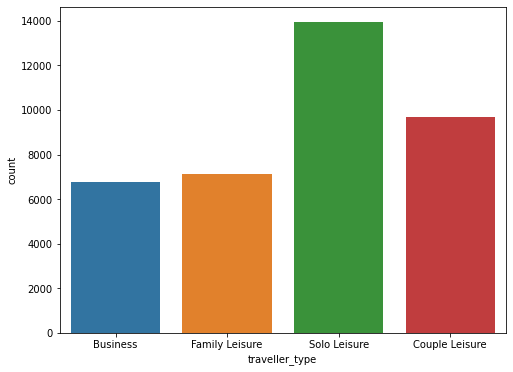

In [24]:
#setting the figure size and plotting the graph
plt.figure(figsize=(8,6))
sns.countplot(airline_df['traveller_type'])



From above plot

* Travelling type of Solo Leisure has more ratings



###**2) Which type of Cabin has more recommendation?**


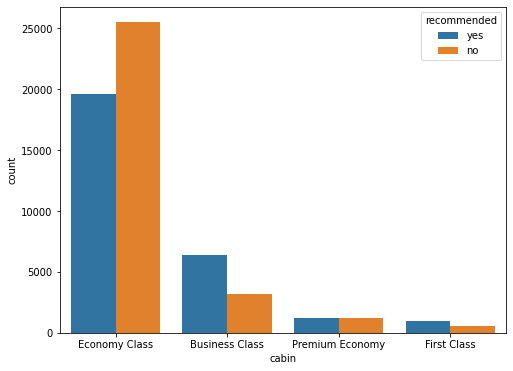

In [25]:
#setting the figure size and plotting the graph
plt.figure(figsize=(8,6))
sns.countplot(airline_df['cabin'],hue=airline_df['recommended'])

On the basis of graph -

* Economy class has highest recommendation with bad reviews.

* Business class has second most recommended cabin type with good reviews.

* premium economy has equal reviews.

* first class is least recommend cabin type with good reviews.

###**3) Is it Solo Leisure worth for Money?**


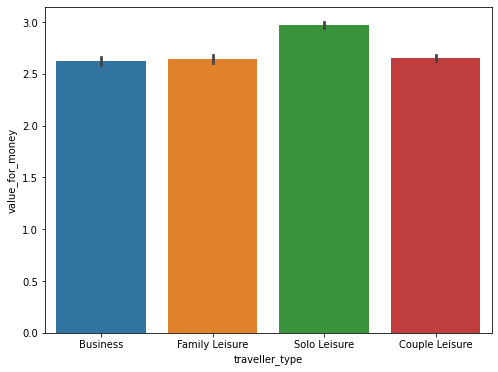

In [26]:
#setting the figure size and plotting the grap
plt.figure(figsize=(8,6))
sns.barplot(x=airline_df['traveller_type'],y=airline_df['value_for_money'])



From above plot

  Yes,Travelling Type of Solo Leisure worth of Money compare to other type of travelling.



###**4) In Economy Class what is the average ratings of Food_bev and entertainment given by passenger?**


In [27]:
#performing the grouphby method 
eda_4=airline_df.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()
eda_4

,cabin,food_bev,entertainment
0,Business Class,3.525108,3.356407
1,Economy Class,2.776919,2.758083
2,First Class,3.384295,3.280827
3,Premium Economy,2.919603,3.038980


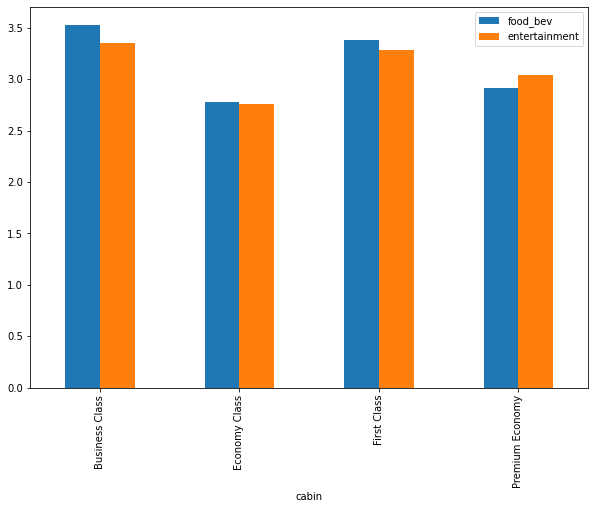

In [28]:
plt.rcParams['figure.figsize']=(10,7)
eda_4.plot(x="cabin", y=["food_bev", "entertainment"], kind="bar")



From above plot

In Economy Class the average ratings of Food_bev and entertainment given by passenger is lowest compared to other cabin classes.



###**4) Which cabin type has more service ratings?**

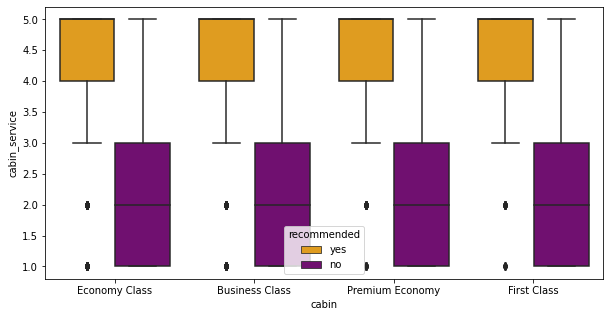

In [29]:
#Cabin type and cabin service ratings
plt.figure(figsize=(10,5))
sns.boxplot(airline_df.cabin, airline_df.cabin_service, hue = airline_df['recommended'], palette= ['orange','purple'])



* First class travellers are least likely to recommend the  airlines.

* Recommendation is most probable when the cabin service is given full star rating ie 5 out of 5 here.

* In economy class if we got ratings between 4 to 5 that means airlines recommended.



###**5) Which cabin type has overall service ratings?** 

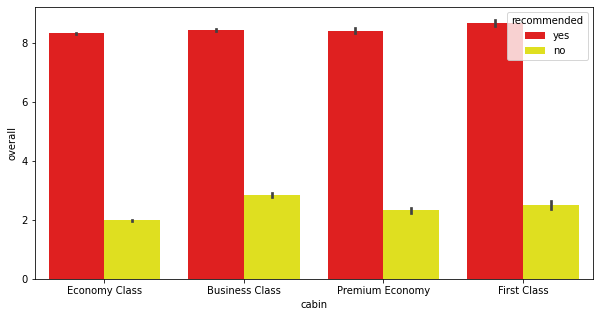

In [30]:
#Cabin type and overall service ratings (out of 10)
plt.figure(figsize=(10,5))
sns.barplot(airline_df.cabin, airline_df.overall, hue = airline_df['recommended'], palette= ['red','yellow'])


* If the trip is rated above 8 for overall section, the trip is most likely be recommended by the travellers.
    
* If it is below 3 , the unhappy travellers has not referred the airlines to their friends irrespective of their cabin type.



###**7) Which travellers_type has overall service ratings?**

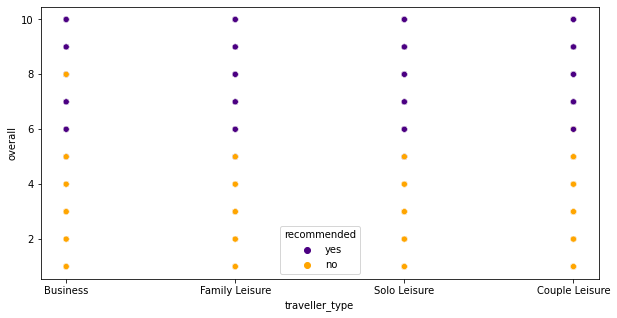

In [31]:
#Traveller type and overall service ratings (out of 10 )
plt.figure(figsize=(10,5))
sns.scatterplot(airline_df.traveller_type, airline_df.overall, hue = airline_df['recommended'], palette= ['indigo','orange'])

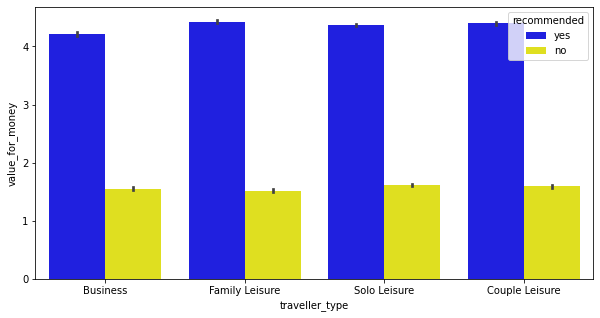

In [32]:
#Traveller type and value for money ratings (out of 5 )
plt.figure(figsize=(10,5))
sns.barplot(airline_df.traveller_type, airline_df.value_for_money, hue = airline_df['recommended'], palette= ['blue','yellow'])



* When the cabin_Service is rated 5, it is highly likely that the reviewer has recommended the airlines to travel irrespective of the type of cabin.

* Economy class is the most recommended cabin type, whereas business class is the least recommended one


##**8)Which airline made highest trips?**

In [33]:
# Get the number of trips each airline make.
trip_by_airlines = airline_df['airline'].value_counts()
trip_by_airlines

Spirit Airlines       2871
American Airlines     2846
United Airlines       2774
British Airways       2731
Emirates              1763
                      ... 
QantasLink             104
Adria Airways           85
Air Arabia              80
Tunisair                71
Thai Smile Airways      48
Name: airline, Length: 81, dtype: int64

Getting more visualized view of top 10 airlines trip through graph.

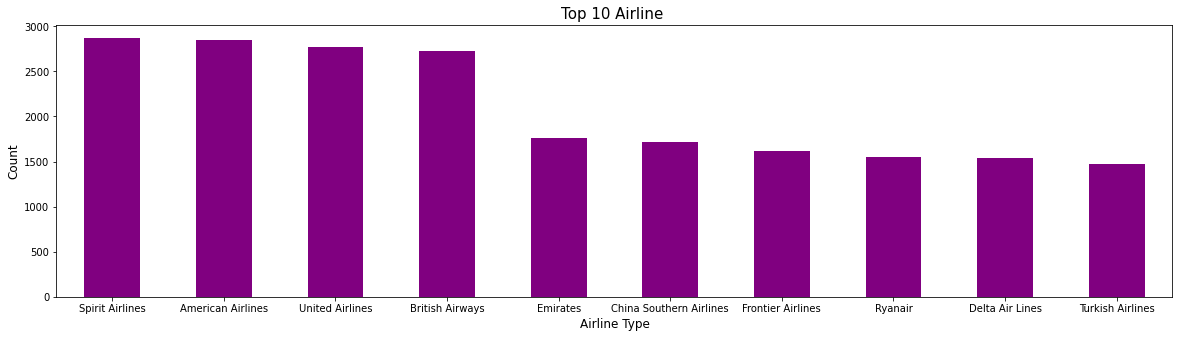

In [34]:
# Visualize the top 10 airlines with most trips
plt.figure(figsize=(20,5))
trip_by_airlines[:10].plot(kind='bar',color = 'purple')
plt.xlabel('Airline Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Top 10 Airline ',fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

We have observed that the top 10 airlines with most trips are-

* Spirit Airlines  
* American Airlines 

* United Airlines 

* British Airways

* Emirates 

* china southern airline 

* frontier airlines 

* ryanair 

* delta air lines 

* turkish airlines

##**9) Comparison of all independent variable/features?**

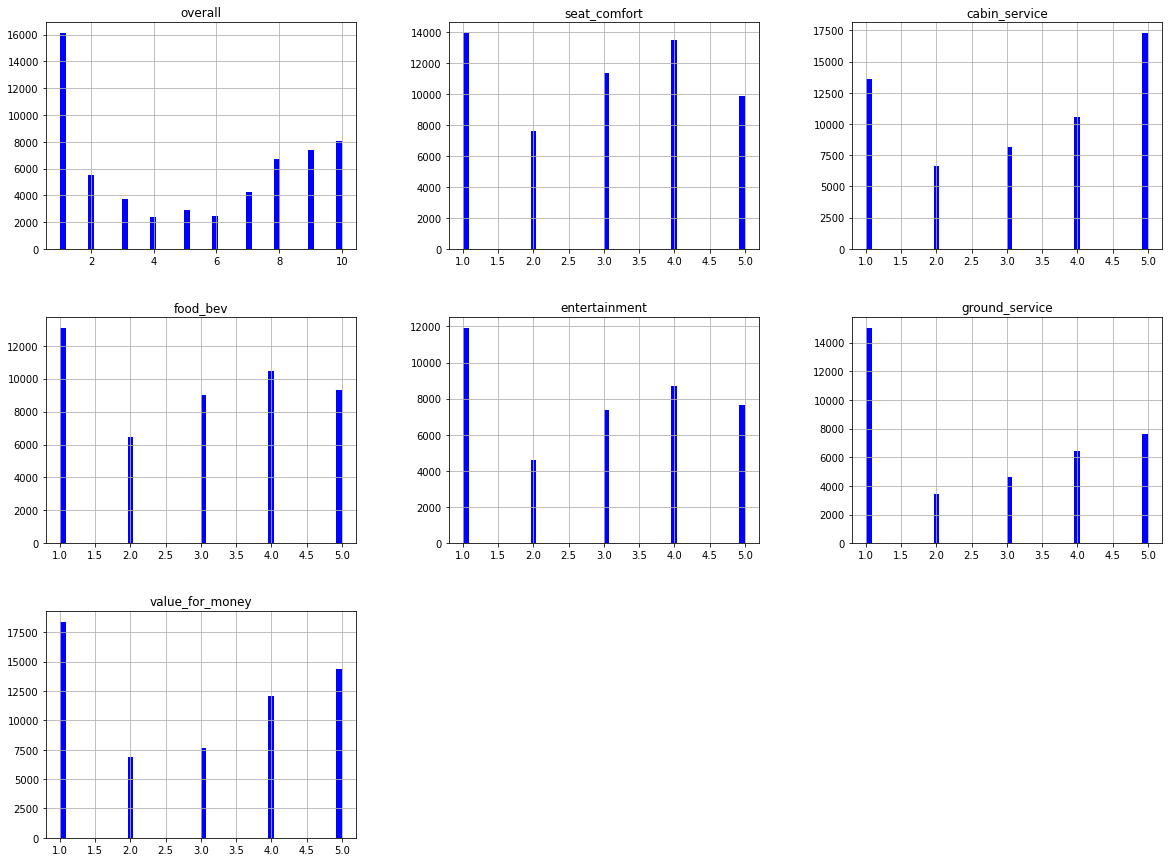

In [35]:
#frequency distribution using histgram
airline_df.hist(bins=50, figsize=(20,15),color = 'blue')
plt.show()

From above plot

* The overall feature ratings of 1 to 2 occur more frequently. 
From Seat comfort feature, We can say that rating of 1 is highest and rating of 4 is the second highest.


* From cabin service feature, We can say that rating of 5 is highest and rating of 1 is the second highest.

* The food bev feature ratings of 2,4 and 5 are varies equally.Which means their frequency are approximately equal.

* The features of both the entertainment & ground service, We can say that ratings of 3 is highest and ratings of 1 is the second highest.

* From value for money feature, It clearly shows that most of the passenger gives ratings of 1 as highest. From this we can say that most of the airline does not provide good service to passenger.

#**Droping Unnecessary columns**

In [36]:
#Checking Percentage wise missing values.
def missing_values_per_check(df):
    percent_missing = airline_df.isnull().sum() * 100 / len(airline_df)
    missing_values_df = pd.DataFrame({'column_name': airline_df.columns,
                                     'percent_missing': percent_missing})
    return missing_values_df.sort_values('percent_missing',ascending=False)

In [37]:
#Checking Percentage wise missing values.
missing_values_per_check(airline_df)

,column_name,percent_missing
aircraft,aircraft,69.782950
ground_service,ground_service,39.250458
date_flown,date_flown,38.817338
route,route,38.688219
traveller_type,traveller_type,38.644090
entertainment,entertainment,34.247516
food_bev,food_bev,20.990782
seat_comfort,seat_comfort,8.127942
cabin_service,cabin_service,8.080544
cabin,cabin,4.051713


In [38]:
#Showing the unique aircraft names
airline_df.aircraft.unique()

array([nan, 'A330', 'Boeing 737-800 / A330-300', ...,
       'Boeing 737-800 and Embraer 190', 'Boeing 737-400/ 737-800',
       'boeing 767'], dtype=object)

In [39]:
#checking the number of unique aircrafts
airline_df.aircraft.nunique()

2088

Droping the aircraft column from data as it have highest null values.

In [40]:
airline_df = airline_df.drop(['aircraft'],axis = 1)

In [41]:
#droping the columns from data which are not for our use
airline_df = airline_df.drop(['author','review_date','route','date_flown','customer_review'],axis = 1)
airline_df.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes


Reason of droping columns--


* Author - Being the categorical with high Variability not required for prediction.
* Route - Not needed for building a model as it is independent of the Services and Quality of travel.
* Date_flown - Not needed for building a model as it is not a time series data, also some common time period is there between 2 dates. 
* Review_date - Similar to Date_flown
* Customer_review - As it is related to overall review feature of the datasets.

On the basis of null value percentage we divide our data in two parts-

* high_null = columns which have high percentage of null values.
* low_null = columns which have low percentage of null values.

In [42]:
#Splitting the Numeric column
low_null = ['overall','seat_comfort','cabin_service','value_for_money']
high_null = ['food_bev','entertainment','ground_service']

In [43]:
#Imputation technique using Quantile-1 value
def impute_by_q1_values(df,column):
  Q1=np.percentile(np.sort(df[column].dropna()),25)
  df[column].fillna(Q1,inplace=True)

In [44]:
#Looping the null value column
for col in low_null:
  impute_by_q1_values(airline_df,col)

Imputed null values by Quantile-1 for the columns have low null value percentage.

In [45]:
#Imputation technique using Median Imputation
def median_imputation(df,column):
  df[column].fillna(df[column].median(),inplace=True)

In [46]:
#Looping the null value column
for col in high_null:
  median_imputation(airline_df,col)

Imputed null values by Median Imputaion for the columns have high percetage.

In [47]:
#after imputed null values
airline_df.head(1)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,1.0,NaN,NaN,2.0,2.0,3.0,3.0,3.0,1.0,NaN


Now we are left with null values in **traveller_type , cabin , recommeded** column.

In [48]:
#Remove recommended null value row
airline_df.dropna(subset=['recommended'],inplace=True)

In [49]:
airline_df['traveller_type'].fillna(method="ffill",inplace=True)

In [50]:
airline_df['cabin'].fillna(airline_df['cabin'].mode().values[0],inplace=True)

Filling **traveller_type** column with **Mode Imputation** 

**cabin** column with **Forward fill method.**

In [51]:
airline_df.head(1)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes


In [52]:
#Checking the new null value percentage
missing_values_per_check(airline_df)

,column_name,percent_missing
airline,airline,0.0
overall,overall,0.0
traveller_type,traveller_type,0.0
cabin,cabin,0.0
seat_comfort,seat_comfort,0.0
cabin_service,cabin_service,0.0
food_bev,food_bev,0.0
entertainment,entertainment,0.0
ground_service,ground_service,0.0
value_for_money,value_for_money,0.0


In [53]:
airline_df.shape

(59761, 11)

It is better to work with clean data for prediction rather than huge corrupt data.

#**Converting target as categorical data into numerical data: 'Label Encoding'**

In [54]:
#converting targeted column
airline_df['recommended'].replace({'yes':1,'no':0},inplace=True)

In [55]:
airline_df.head(2)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,1
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,0


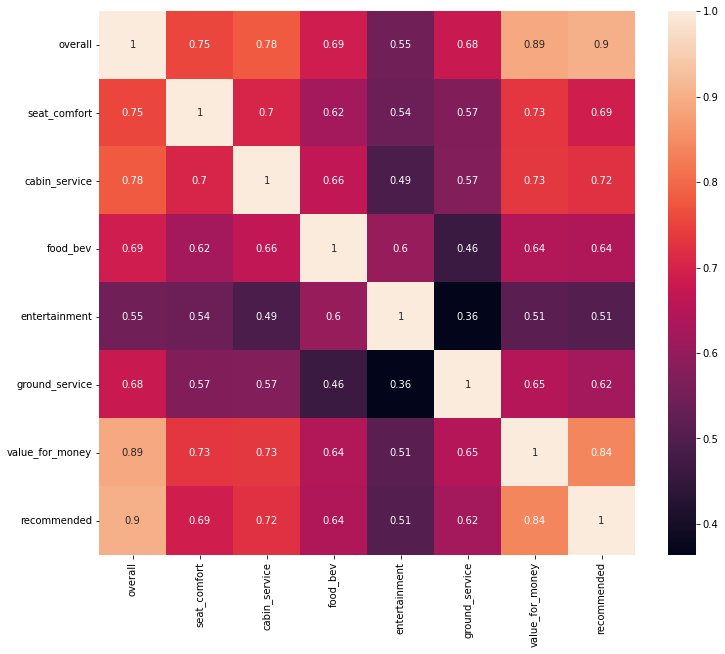

In [56]:
plt.figure(figsize=(12,10))
sns.heatmap(airline_df.corr(), annot=True)

###**Correlation plot**

Drop overall column as it has highest correlation value than others.

**Removing Multicollinearity features**

In [57]:
#Creating a function to remove multicollinear
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [58]:
calc_vif(airline_df[[i for i in airline_df.describe().columns if i not in ['recommended','value_for_money','overall']]])

,variables,VIF
0,seat_comfort,12.743652
1,cabin_service,12.939449
2,food_bev,13.023156
3,entertainment,9.669901
4,ground_service,8.380607


In [59]:
#drop overall column 
airline_df.drop(["overall"], axis = 1, inplace = True)

In [60]:
airline_df.drop(["airline"], axis = 1, inplace = True)

Here we are dropping airline column from our data as it is no usecase further.

#**Defining the dependent and independent variables.**

In [61]:
#separating the dependent and independent variables
y = airline_df['recommended']
x = airline_df.drop(columns = 'recommended')

In [62]:
x.columns

Index(['traveller_type', 'cabin', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money'],
      dtype='object')

#**One hot encoding**

In [63]:
x = pd.get_dummies(x)

In [64]:
x.shape

(59761, 14)

In [65]:
x.head(2)

,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,traveller_type_Business,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,cabin_Business Class,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
1,4.0,5.0,4.0,4.0,2.0,4.0,1,0,0,0,0,1,0,0
3,4.0,1.0,1.0,1.0,1.0,1.0,0,0,1,0,0,1,0,0


In [66]:
print("The Percentage of No labels of Target Variable is",np.round(y.value_counts()[0]/len(y)*100))
print("The Percentage of Yes labels of Target Variable is",np.round(y.value_counts()[1]/len(y)*100))


The Percentage of No labels of Target Variable is 52.0
The Percentage of Yes labels of Target Variable is 48.0


The Percentage of both labels('yes','no) is approximately equal. So no need of Handling Class Imbalance technique.

#**Splitting Train and Test Data**

In [67]:
#train and test split
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 42)

In [68]:
#shape of x_train and x_test data
print(x_train.shape)
print(x_test.shape)

(47808, 14)
(11953, 14)


In [69]:
#shape of y_train and y_test data
print(y_train.shape)
print(y_test.shape)

(47808,)
(11953,)


#**Model-1:Fitting Logistic Regression**

In [70]:
#logistic regression fitting 
log_reg = LogisticRegression(fit_intercept=True, max_iter=10000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [71]:
log_reg.coef_

array([[ 0.29470838,  0.54968868,  0.43532953,  0.24885675,  0.72106364,
         1.63397577,  0.14717863, -0.05302362, -0.16246925,  0.063547  ,
         0.1459788 , -0.06847132,  0.11168624, -0.19396096]])

In [72]:
log_reg.intercept_

array([-11.83828652])

In [73]:
log_reg.score(x_test,y_test)

0.9324019074709278

In [74]:
y_pred = log_reg.predict(x_test)

In [75]:
#report of logistic regression 
report_lR = classification_report(y_test, y_pred)
print(report_lR)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6225
           1       0.92      0.94      0.93      5728

    accuracy                           0.93     11953
   macro avg       0.93      0.93      0.93     11953
weighted avg       0.93      0.93      0.93     11953



**93%** accuracy with **Logistic Regression**

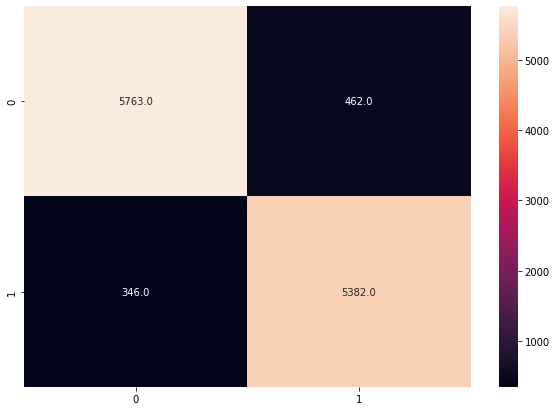

In [76]:
#cofusion matrix of logistic regression 
confuse_matrix_lr = confusion_matrix( y_test,y_pred)
#plooting confusion matrix
sns.heatmap(confuse_matrix_lr, annot=True, fmt = ".1f")

#Implementing Cross-validated Logistic Regression

In [77]:
logistic = LogisticRegression()

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
scores = cross_val_score(log_reg, x_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.9405982  0.94415394 0.93766994 0.94122569 0.93913407 0.93474169
 0.94080736 0.94143485 0.93284519 0.93702929]


In [80]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.9328451882845188, 0.9389640216372515, 0.9441539426898139)

#**Model-2:Fitting Decision Tree Classifer**

In [81]:
#Initializing Decision Tree Model object
tree_classify=DecisionTreeClassifier()
#Taining a model with x and y
tree_classify.fit(x_train,y_train)

DecisionTreeClassifier()

In [82]:
print("Training Accuracy of Decision Tree Model is",tree_classify.score(x_train,y_train))
print("Testing Accuracy of Decision Tree Model is",tree_classify.score(x_test,y_test))

Training Accuracy of Decision Tree Model is 0.9745440093708166
Testing Accuracy of Decision Tree Model is 0.9167572994227391


In [83]:
y_pred = tree_classify.predict(x_test)

In [84]:
#report of decision tree 
report_dec_tree = classification_report(y_test, y_pred)
print(report_dec_tree)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6225
           1       0.92      0.91      0.91      5728

    accuracy                           0.92     11953
   macro avg       0.92      0.92      0.92     11953
weighted avg       0.92      0.92      0.92     11953



Here our model is Overfitted. So Hyperparameter tuning is done to prune a Decision tree to preserve Generalized Model.

#Hyperparameter Tuning For Decision Tree

In [85]:
#setting the parameters and scoring metric
parameters = {"criterion":["gini","entropy"],"max_depth":[5,7],"min_samples_split":[5,7],"min_samples_leaf":[2,3]}
scoring_=['f1','recall','precision','accuracy']

In [86]:
#performing hyperparameter tuning using gridsearchcv

#setting an estimator,and crossvalidation
tree_cv = GridSearchCV(estimator=tree_classify, param_grid=parameters, scoring=scoring_, cv=5,refit='accuracy')

#Fitting x and y to gridsearchcv model using an estimator Decision tree classifier
tree_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             refit='accuracy',
             scoring=['f1', 'recall', 'precision', 'accuracy'])

In [87]:
#calling an best params
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 7}

In [88]:
#calling an best score
tree_cv.best_score_

0.9371652678720052

**93%** accuracy of **Decision Tree** with the help of hypermatring tunning.

#**Model-3:Fitting Random Forest**

In [89]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [90]:
random_forest.score(x_test,y_test)

0.9293064502635322

In [91]:
#report of decision tree 
report_ran_forest = classification_report(y_test, y_pred)
print(report_ran_forest)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6225
           1       0.92      0.91      0.91      5728

    accuracy                           0.92     11953
   macro avg       0.92      0.92      0.92     11953
weighted avg       0.92      0.92      0.92     11953



**92%** accuracy with **Random Forest**

#Implementing Cross-validated Random Forest

In [92]:
random_forest_gridcv = GridSearchCV(estimator=random_forest,
                       param_grid = parameters,
                       cv = 5, verbose=2)

In [93]:
random_forest_gridcv.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.4s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             verbose=2)

In [94]:
random_forest_gridcv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

#**Model-4:K-Nearest Neighbour**

In [95]:
k_neighbor = KNeighborsClassifier()
k_neighbor.fit(x_train, y_train)

KNeighborsClassifier()

In [96]:
y_pred = k_neighbor.predict(x_test)

In [97]:
# Compute accuracy on the training set
train_accuracy = k_neighbor.score(x_train, y_train)
print(train_accuracy)
# Compute accuracy on the test set
test_accuracy = k_neighbor.score(x_test, y_test) 
print(test_accuracy)

0.9493390227576974
0.9293901112691375


**92%** accuracy with **K-Nearest-Neighbor**

In [98]:
#cofusion matrix of k_neighbor  
confuse_matrix_k_neighbor  = confusion_matrix(y_test,y_pred)
confuse_matrix_k_neighbor

array([[5815,  410],
       [ 434, 5294]])

In [99]:
# Area under ROC curve
roc_auc_score(y_test,y_pred)

0.9291841948800791

#**Model-5:Support Vector Machine**

In [100]:
support_vector = SVC(kernel='linear')
support_vector.fit(x_train, y_train)

SVC(kernel='linear')

In [101]:
#score for support vector machine
support_vector.score(x_test, y_test)

0.9318162804316907

**93%** accuracy with **support vector machine**

In [102]:
y_pred = support_vector.predict(x_test)

In [103]:
#confusion matrix
support_vector_con_mat = confusion_matrix( y_test,y_pred)
support_vector_con_mat

array([[5747,  478],
       [ 337, 5391]])

#**Model-6:Naïve Bayes Classifier**

In [104]:
#Implimanting naive bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [105]:
#score for naive bayes
naive_bayes.score(x_train,y_train)

0.9177543507362784

**91%** accuracy with **naive bayes classifier**

In [106]:
# making predictions on the testing set
y_pred = naive_bayes.predict(x_test)

In [107]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 91.0901029030369


###**Accuracy Metrics for All Fitted Model**

In [108]:
#Creating a function to return all Models Accuracy Score 

def accuracy_of_each_model(model,X_train,X_test):

  #predicting a train datas
  y_train_preds=model.predict(X_train)

  #predicting a test datas
  y_test_preds=model.predict(X_test)

  #storing all training scores
  train_scores=[]

  #storing all test scores
  test_scores=[]
  metrics=['Accuracy_Score','Precsion_Score','Recall_Score','Roc_Auc_Score']

  # Get the accuracy scores
  train_accuracy_score = accuracy_score(y_train,y_train_preds)
  test_accuracy_score = accuracy_score(y_test,y_test_preds)
  
  train_scores.append(train_accuracy_score)
  test_scores.append(test_accuracy_score)

  # Get the precision scores
  train_precision_score = precision_score(y_train,y_train_preds)
  test_precision_score = precision_score(y_test,y_test_preds)

  train_scores.append(train_precision_score)
  test_scores.append(test_precision_score)

  # Get the recall scores
  train_recall_score =recall_score(y_train,y_train_preds)
  test_recall_score =recall_score(y_test,y_test_preds)

  train_scores.append(train_recall_score)
  test_scores.append(test_recall_score)

  # Get the roc_auc scores
  train_roc_auc_score=roc_auc_score(y_train,y_train_preds)
  test_roc_auc_score =roc_auc_score(y_test,y_test_preds)

  train_scores.append(train_roc_auc_score)
  test_scores.append(test_roc_auc_score)

  return train_scores,test_scores,metrics



In [109]:
models=[log_reg,tree_cv,random_forest,k_neighbor,support_vector,naive_bayes]
name=['Logistic Regression Model','Decision Tree Model After Hyperparameter Tuning','Random Forest Model After Hyperparameter Tuning','k_neighbor','support vector','naive bayes']

In [110]:
for model_ in range(len(models)):
  train_score_,test_score_,metrics_=accuracy_of_each_model(models[model_],x_train,x_test)
  print("-*-*-"*3+f"{name[model_]}"+"-*-*-"*4)
  print("")
  print(pd.DataFrame(data={'Metrics':metrics_,'Train_Score':train_score_,'Test_Score':test_score_}))
  print("")

-*-*--*-*--*-*-Logistic Regression Model-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.938964    0.932402
1  Precsion_Score     0.928162    0.920945
2    Recall_Score     0.944959    0.939595
3   Roc_Auc_Score     0.939237    0.932689

-*-*--*-*--*-*-Decision Tree Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.940972    0.933239
1  Precsion_Score     0.934318    0.926766
2    Recall_Score     0.942280    0.934532
3   Roc_Auc_Score     0.941032    0.933290

-*-*--*-*--*-*-Random Forest Model After Hyperparameter Tuning-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.974544    0.929306
1  Precsion_Score     0.970604    0.926165
2    Recall_Score     0.976104    0.926327
3   Roc_Auc_Score     0.974615    0.929188

-*-*--*-*--*-*-k_neighbor-*-*--*-*--*-*--*-*-

          Metrics  Train_Score  Test_Score
0  Accuracy_Score     0.949339  


###**Conclusion**

  The Models used for this Classsification problem are

 1. Logistic Regression Model
 2. Decision Tree Model
 3. Random Forest Model
 4. K-Nearest Neighbor Model
 5.Support Vector Machine Model 
 6.Naive Bayes

* We performed Hyperparameter tuning using Gridsearch CV method for Decision Tree Model, Random Forest Model , K-Nearest Neighbor ,Support Vector Machine and Naive Bayes. To increase accuracy and avoid Overfitting Criteria, this is done. After that, we finalized the Gradient Boosting model by fine-tuning the hyperparameters.

* Based on the knowledge of the business and the problem usecase. The Classification metrics of Recall is given __first priority__ , Accuray is given __second priority__ , and ROC AUC is given __third priority__.

* We have built classifier models using 6 different types of classifiers and all these are able to give accuracy of more than 90%.* We can conclude that LogisticRegression gives the best model.

* model evaluation metrics comparison, we can see that Support Vector Machine being the model with highest accuracy rate by a very small margin, works best among the experimented models for the given dataset.

* The most important feature are overall rating and Value for money that contribute to a model's prediction whether a passenger will recommened a particular airline to his/her friends.

* The classifier models developed can be used to predict passenger referral as it will give airlines ability to identify impactful passengers who can help in bringing more revenues.

* As a result, in order to increase their business or grow, our client must provide excellent cabin service, ground service, food beverage entertainment, and seat comfort.

#**Thank You for your Time**